<a href="https://colab.research.google.com/github/Neha-ETTALEBY/DM-project/blob/main/netflix-dm-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prétraitement




## 1. Chargement et Exploration des Données



In [3]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import files
uploaded = files.upload()  # Cette commande ouvre une boîte de dialogue pour télécharger votre fichier


Saving netflix.csv to netflix.csv


In [4]:
# Charger le dataset
df = pd.read_csv("netflix.csv")

# Afficher les premières lignes
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        



### Résultats
- Le dataset contient **12 colonnes principales** :
  1. `show_id` : Identifiant unique pour chaque contenu.
  2. `type` : Type du contenu (Movie ou TV Show).
  3. `title` : Titre du contenu.
  4. `director` : Nom du réalisateur (présente des valeurs manquantes).
  5. `cast` : Liste des acteurs principaux (présente des valeurs manquantes).
  6. `country` : Pays d'origine (présente des valeurs manquantes).
  7. `date_added` : Date d'ajout sur Netflix.
  8. `release_year` : Année de sortie.
  9. `rating` : Classification par âge.
  10. `duration` : Durée (films) ou nombre de saisons (émissions).
  11. `listed_in` : Genres (catégories associées au contenu).
  12. `description` : Brève description du contenu.

### Observations
1. Certaines colonnes, comme `director`, `cast`, et `country`, présentent des **valeurs manquantes** qui nécessiteront un nettoyage.
2. La colonne `duration` contient des valeurs **mixtes** :
   - Films : durées en minutes (ex. : "90 min").
   - Émissions : nombres de saisons (ex. : "2 Seasons").
3. La colonne `type` indique qu'il y a deux types de contenu principaux : **Movies** et **TV Shows**.
4. Les colonnes textuelles comme `description` et `listed_in` sont des candidates pour une **extraction de caractéristiques** (TF-IDF).

### Actions Suivantes
- Examiner plus en détail la structure des données avec `df.info()`.
- Identifier précisément le nombre de valeurs manquantes dans chaque colonne.
- Décider des stratégies de nettoyage pour les colonnes avec des données manquantes.






## 2. Analyse Structurelle et Nettoyage des Données




In [5]:
# Vérifier les informations du dataset
print(df.info())

# Résumé statistique des colonnes numériques
print(df.describe())

# Afficher les valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
show_id            0
type               0
title              0
dire


### Résultats
1. Le dataset contient **8807 lignes** et **12 colonnes**.
2. La colonne `release_year` est numérique, tandis que les autres colonnes sont textuelles.
3. Plusieurs colonnes présentent des valeurs manquantes :
   - `director` : 30% des valeurs manquantes.
   - `cast` et `country` : Environ 9% des valeurs manquantes.
   - `date_added`, `rating`, et `duration` : Moins de 1% de valeurs manquantes.

### Observations
- La colonne `release_year` montre que la majorité des contenus sont récents (après 2013), avec une moyenne de sortie en **2014**.
- Les colonnes `director`, `cast`, et `country` nécessitent un traitement particulier pour les valeurs manquantes.

### Actions recommandées
1. Gérer les valeurs manquantes dans `director`, `cast`, et `country` :
   - Remplir par `"Unknown"` ou `"Not Specified"`.
2. Analyser la pertinence des colonnes avec trop de valeurs manquantes (`director`).
3. Vérifier les contenus anciens (`release_year < 2000`) et décider de les inclure ou non.




## 3. Analyse des Valeurs Manquantes


In [6]:
# Calculer le pourcentage de valeurs manquantes
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


### Résultats
Le pourcentage de valeurs manquantes dans chaque colonne a été calculé :

| Colonne        | Pourcentage de valeurs manquantes |
|----------------|-----------------------------------|
| show_id        | 0.00%                            |
| type           | 0.00%                            |
| title          | 0.00%                            |
| director       | **29.91%**                       |
| cast           | 9.37%                            |
| country        | 9.44%                            |
| date_added     | 0.11%                            |
| release_year   | 0.00%                            |
| rating         | 0.05%                            |
| duration       | 0.03%                            |
| listed_in      | 0.00%                            |
| description    | 0.00%                            |

### Observations
1. La colonne `director` présente un pourcentage élevé de valeurs manquantes (**29.91%**). Une attention particulière est nécessaire pour décider si elle doit être remplie ou supprimée.
2. Les colonnes `cast` et `country` ont environ **9%** de valeurs manquantes. Cela peut être géré en remplissant les valeurs par `"Unknown"`.
3. Les colonnes `date_added`, `rating`, et `duration` ont moins de **1%** de valeurs manquantes, ce qui est facile à traiter.

### Actions recommandées
1. Remplir les valeurs manquantes dans les colonnes suivantes :
   - `director`, `cast`, `country` : Remplir par `"Unknown"`.
   - `date_added`, `rating`, `duration` : Remplir par la valeur la plus fréquente.
2. Envisager de supprimer la colonne `director` si elle n'est pas pertinente pour l'analyse.


## 4. Nettoyage des Valeurs Manquantes (Colonnes Numériques)


In [8]:
# Remplir les valeurs manquantes restantes par la moyenne (pour les colonnes numériques)
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Vérifier après le nettoyage
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### Résultats
1. Les colonnes numériques ont été identifiées et les valeurs manquantes ont été remplies par leur **moyenne**.
2. La seule colonne numérique, `release_year`, ne contenait pas de valeurs manquantes, donc aucune modification n'a été apportée.
3. Les colonnes suivantes présentent encore des valeurs manquantes, car elles sont **non numériques** :
   - `director` : 2634 valeurs manquantes.
   - `cast` : 825 valeurs manquantes.
   - `country` : 831 valeurs manquantes.
   - `date_added` : 10 valeurs manquantes.
   - `rating` : 4 valeurs manquantes.
   - `duration` : 3 valeurs manquantes.

### Observations
- Les colonnes non numériques nécessitent des stratégies spécifiques pour le remplissage des valeurs manquantes :
  - Remplir les colonnes `director`, `cast`, et `country` par `"Unknown"`.
  - Remplir `date_added`, `rating`, et `duration` par des valeurs logiques ou fréquentes.

### Actions Suivantes
1. Nettoyer les valeurs manquantes dans les colonnes non numériques :
   - Remplir par `"Unknown"` pour les colonnes textuelles.
   - Utiliser le mode (valeur la plus fréquente) pour `rating` et d'autres colonnes avec peu de valeurs manquantes.
2. Vérifier le dataset après ce nettoyage pour s'assurer qu'il ne reste plus de valeurs manquantes.


## 5. Nettoyage des Valeurs Manquantes (Colonnes Non Numériques)


In [10]:
# Remplir les valeurs manquantes pour les colonnes non numériques

# Remplir 'director', 'cast', et 'country' par "Unknown"
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Remplir 'date_added' par une valeur arbitraire (par exemple, 'Unknown Date')
df['date_added'] = df['date_added'].fillna('Unknown Date')

# Remplir 'rating' par la valeur la plus fréquente (mode)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Remplir 'duration' par une valeur arbitraire ou une estimation
df['duration'] = df['duration'].fillna('Unknown')

# Vérifier à nouveau les valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())


Valeurs manquantes après nettoyage :
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Résultats
Toutes les valeurs manquantes ont été nettoyées, et le dataset est désormais complet. Voici un résumé des modifications apportées :
1. Les colonnes `director`, `cast`, et `country` ont été remplies par `"Unknown"`.
2. La colonne `date_added` a été remplie par `"Unknown Date"`.
3. La colonne `rating` a été remplie par la valeur la plus fréquente (mode).
4. La colonne `duration` a été remplie par `"Unknown"`.

### Observations
- Le dataset ne contient plus aucune valeur manquante, comme le montre le tableau suivant :

| Colonne        | Valeurs manquantes | Action effectuée           |
|----------------|--------------------|----------------------------|
| `director`     | 0                  | Remplie par `"Unknown"`    |
| `cast`         | 0                  | Remplie par `"Unknown"`    |
| `country`      | 0                  | Remplie par `"Unknown"`    |
| `date_added`   | 0                  | Remplie par `"Unknown Date"` |
| `rating`       | 0                  | Remplie par la valeur la plus fréquente |
| `duration`     | 0                  | Remplie par `"Unknown"`    |

### Conclusion
Le dataset est maintenant propre et prêt pour les étapes suivantes :
1. **Extraction des caractéristiques** (par exemple, TF-IDF pour les colonnes textuelles).
2. **Sélection des caractéristiques** pour réduire la complexité des données.

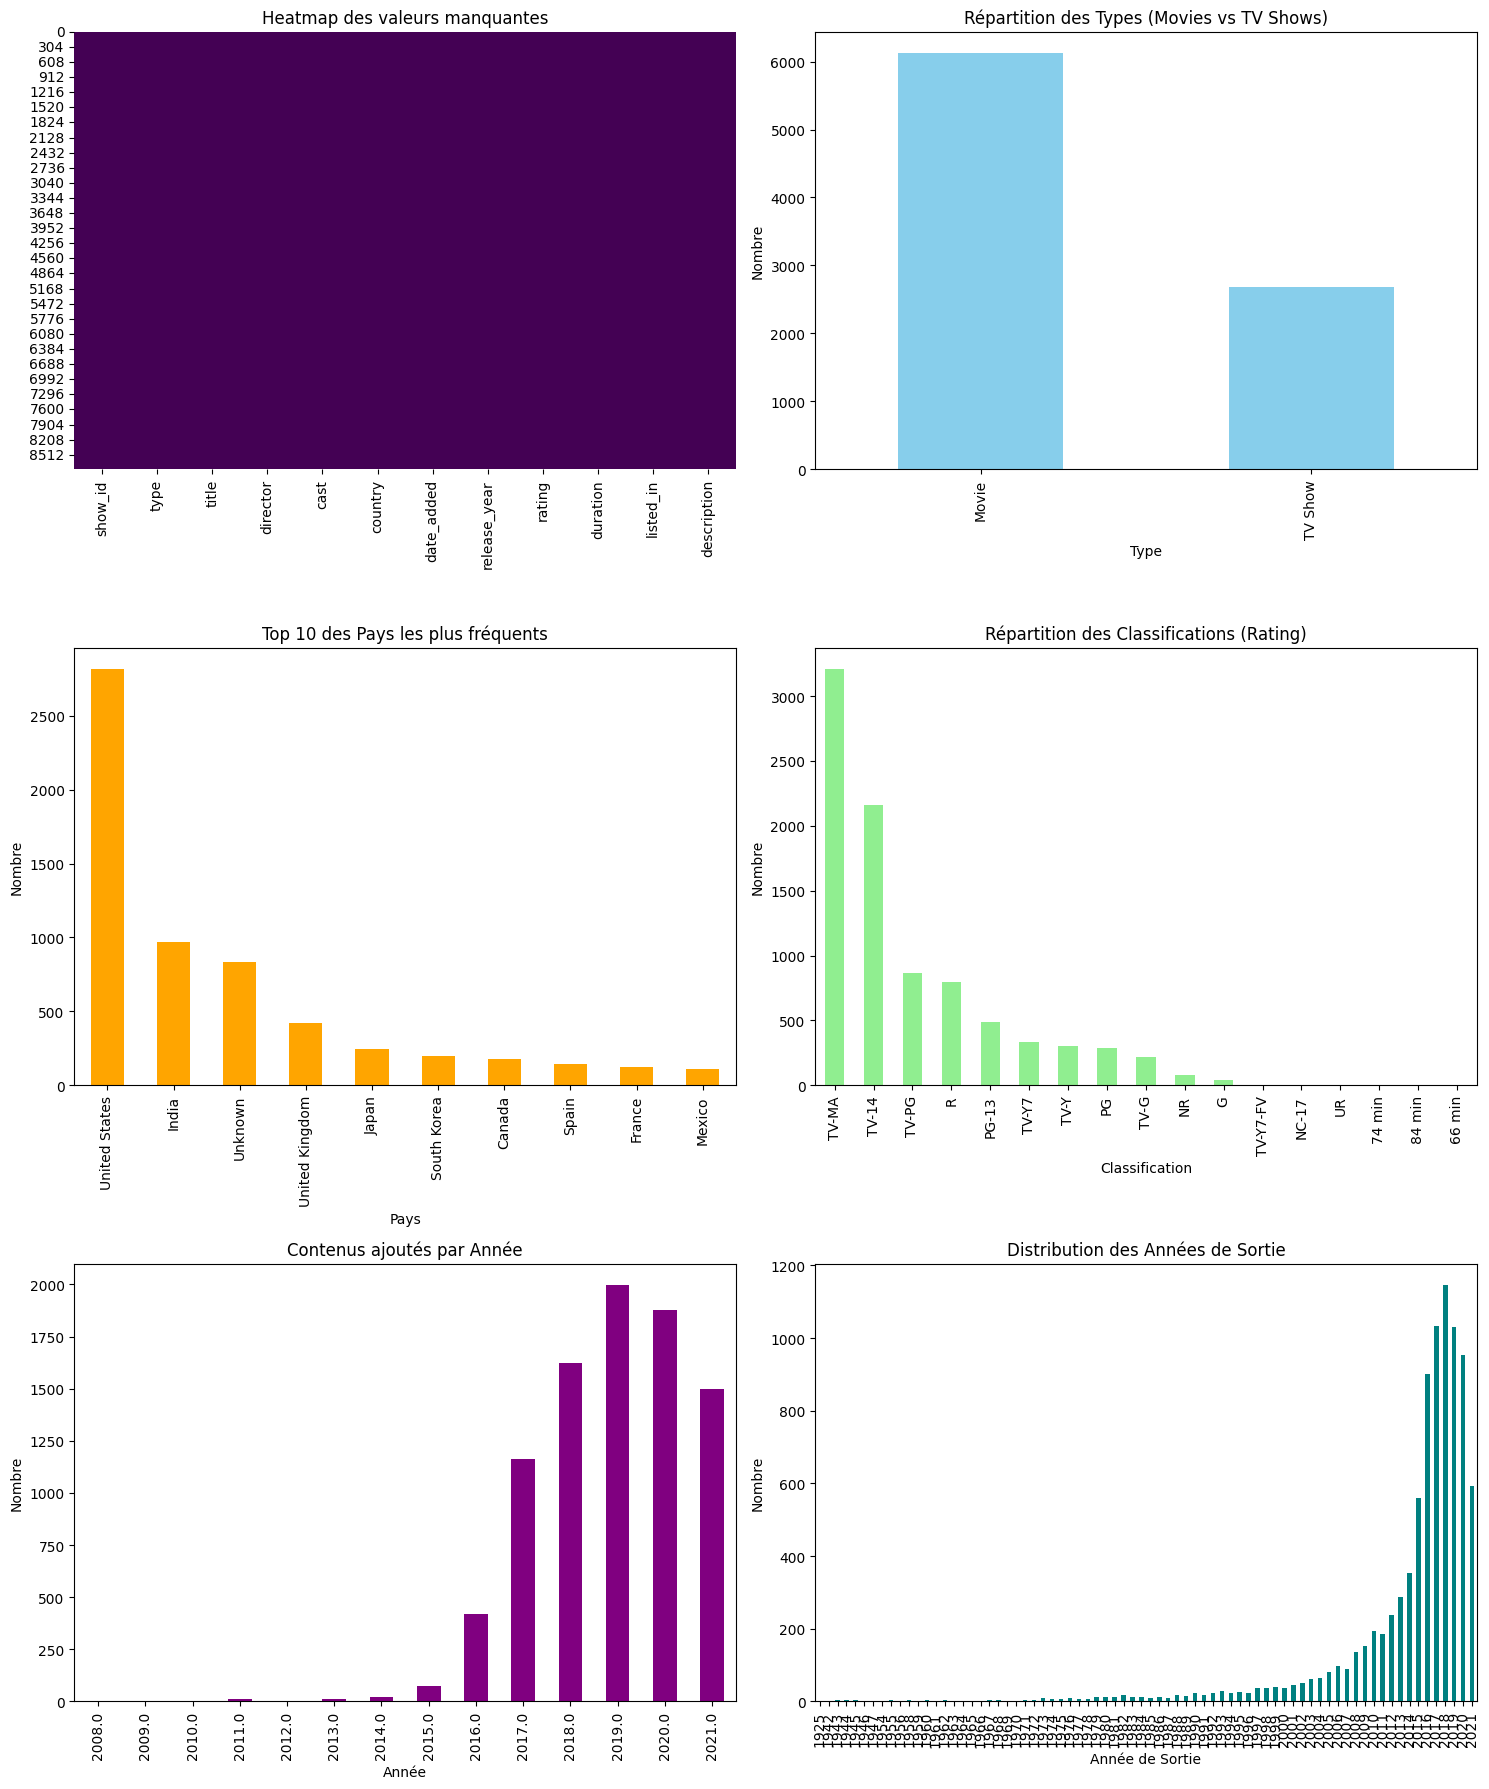

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualisation globale
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Heatmap des valeurs manquantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Heatmap des valeurs manquantes")

# 2. Répartition des types (Movies vs TV Shows)
df['type'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title("Répartition des Types (Movies vs TV Shows)")
axes[0, 1].set_xlabel("Type")
axes[0, 1].set_ylabel("Nombre")

# 3. Top 10 des Pays les plus fréquents
df['country'].value_counts().head(10).plot(kind='bar', color='orange', ax=axes[1, 0])
axes[1, 0].set_title("Top 10 des Pays les plus fréquents")
axes[1, 0].set_xlabel("Pays")
axes[1, 0].set_ylabel("Nombre")

# 4. Répartition des Classifications (Ratings)
df['rating'].value_counts().plot(kind='bar', color='lightgreen', ax=axes[1, 1])
axes[1, 1].set_title("Répartition des Classifications (Rating)")
axes[1, 1].set_xlabel("Classification")
axes[1, 1].set_ylabel("Nombre")

# 5. Contenus ajoutés par Année (basé sur date_added)
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', color='purple', ax=axes[2, 0])
axes[2, 0].set_title("Contenus ajoutés par Année")
axes[2, 0].set_xlabel("Année")
axes[2, 0].set_ylabel("Nombre")

# 6. Distribution des Années de Sortie
df['release_year'].value_counts().sort_index().plot(kind='bar', color='teal', ax=axes[2, 1])
axes[2, 1].set_title("Distribution des Années de Sortie")
axes[2, 1].set_xlabel("Année de Sortie")
axes[2, 1].set_ylabel("Nombre")

plt.tight_layout()
plt.show()
